In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv('Rental_Cleaned.csv')

In [18]:
df.head()

,prop_type,prop_status,price,beds,baths,sqft,rank,source,City,Country,State
0,townhome,for_rent,101,2,3,121.0,9,mls,Staten Island,USA,New York
1,single_family,for_rent,800,1,1,140.0,11,unit_rental,Brooklyn,USA,New York
2,townhome,for_rent,850,1,1,179.0,13,unit_rental,New York,USA,New York
3,single_family,for_rent,900,1,1,140.0,14,unit_rental,Brooklyn,USA,New York
4,apartment,for_rent,945,1,1,140.0,15,unit_rental,Brooklyn,USA,New York


<Axes: >

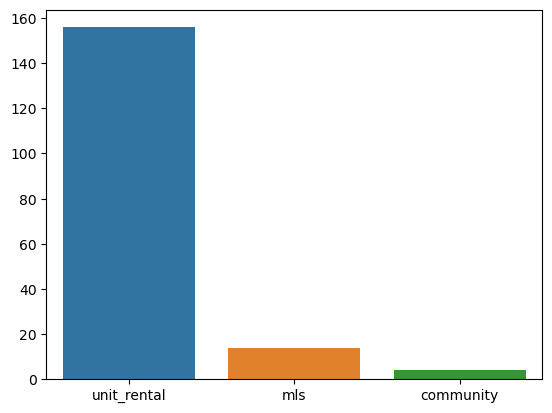

In [29]:
sns.barplot(x=df['source'].value_counts().index,y=df['source'].value_counts().values)

array([<Axes: ylabel='prop_type'>], dtype=object)

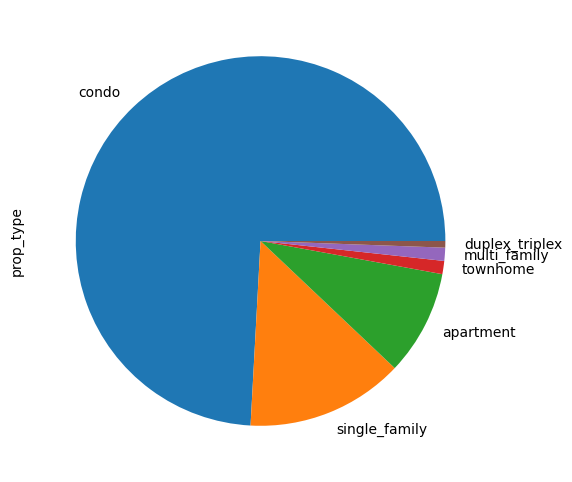

In [34]:
df['prop_type'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

In [37]:
df['prop_status'].unique()

array(['for_rent'], dtype=object)

C:\Users\Shubh\anaconda3\Lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


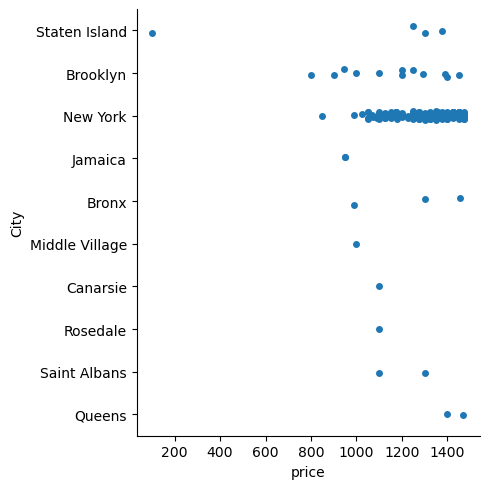

In [44]:
sns.catplot(data=df,y='City',x='price',ax=20)

### New York is most densely populated along with a relatively high rent than other cities
### 2nd position is covered by Brooklyn, which is intuitive as they are metropolitans 

In [46]:
df['source'].value_counts()

unit_rental    156
mls             14
community        4
Name: source, dtype: int64

<Axes: xlabel='sqft', ylabel='price'>

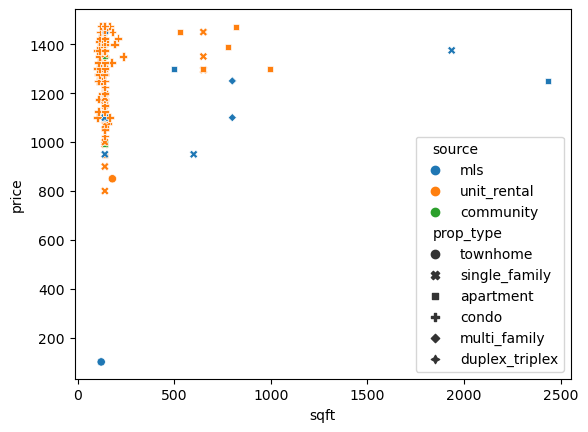

In [62]:
markers = {"mls": "/", "unit_rental":'x' ,"community":'+'}
sns.scatterplot(data=df, x="sqft", y="price", hue="source", style ='prop_type')

### From the graph above, we can realize that 'unit_rental' is highly densed in it's reach for consumer exposure
### We also realize that most properties are condos but fall under 0-500 sqft
### However apartments for multi/single-family consumers are notable by 'mls'

In [69]:
pd.pivot_table(df,values='price',columns='prop_type')

prop_type,apartment,condo,duplex_triplex,multi_family,single_family,townhome
price,1256.25,1305.271318,1200.0,1175.0,1162.708333,475.5


In [70]:
df['prop_type'].value_counts()

condo             129
single_family      24
apartment          16
townhome            2
multi_family        2
duplex_triplex      1
Name: prop_type, dtype: int64

In [84]:
df[(df['prop_type']=='condo')].sum()

prop_type      condocondocondocondocondocondocondocondocondoc...
prop_status    for_rentfor_rentfor_rentfor_rentfor_rentfor_re...
price                                                     168380
beds                                                         515
baths                                                        213
sqft                                                     17686.0
rank                                                        2786
source         unit_rentalunit_rentalunit_rentalunit_rentalun...
City           New YorkNew YorkNew YorkNew YorkNew YorkNew Yo...
Country        USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
State          New YorkNew YorkNew YorkNew YorkNew YorkNew Yo...
dtype: object

In [80]:
df[(df['prop_type']=='condo') & (df['City']=='New York')]

,prop_type,prop_status,price,beds,baths,sqft,rank,source,City,Country,State
11,condo,for_rent,1025,4,1,140.0,25,unit_rental,New York,USA,New York
12,condo,for_rent,1050,4,1,140.0,26,unit_rental,New York,USA,New York
13,condo,for_rent,1050,3,1,140.0,27,unit_rental,New York,USA,New York
14,condo,for_rent,1050,4,1,140.0,28,unit_rental,New York,USA,New York
15,condo,for_rent,1050,4,1,140.0,29,unit_rental,New York,USA,New York
...,...,...,...,...,...,...,...,...,...,...,...
169,condo,for_rent,1475,4,2,140.0,24,unit_rental,New York,USA,New York
170,condo,for_rent,1475,4,2,140.0,25,unit_rental,New York,USA,New York
171,condo,for_rent,1475,3,1,140.0,26,unit_rental,New York,USA,New York
172,condo,for_rent,1475,4,2,140.0,27,unit_rental,New York,USA,New York


### 

In [86]:
pd.pivot_table(df,values='price',columns='prop_type',index=['City'],aggfunc=np.sum)

prop_type,apartment,condo,duplex_triplex,multi_family,single_family,townhome
City,,,,,,
Bronx,3745.0,NaN,NaN,NaN,NaN,NaN
Brooklyn,5985.0,NaN,1200.0,2350.0,4395.0,NaN
Canarsie,1100.0,NaN,NaN,NaN,NaN,NaN
Jamaica,NaN,NaN,NaN,NaN,1900.0,NaN
Middle Village,NaN,NaN,NaN,NaN,1000.0,NaN
New York,3850.0,168380.0,NaN,NaN,15735.0,850.0
Queens,2870.0,NaN,NaN,NaN,NaN,NaN
Rosedale,NaN,NaN,NaN,NaN,1100.0,NaN
Saint Albans,NaN,NaN,NaN,NaN,2400.0,NaN


In [90]:
pd.pivot_table(df,values='price',columns='prop_type',index=['City','source'],aggfunc=np.mean)

prop_type                   apartment        condo  duplex_triplex  \
City           source                                                
Bronx          community       990.00          NaN             NaN   
               mls            1455.00          NaN             NaN   
               unit_rental    1300.00          NaN             NaN   
Brooklyn       community      1000.00          NaN             NaN   
               mls                NaN          NaN             NaN   
               unit_rental    1246.25          NaN          1200.0   
Canarsie       mls            1100.00          NaN             NaN   
Jamaica        mls                NaN          NaN             NaN   
Middle Village unit_rental        NaN          NaN             NaN   
New York       community      1275.00          NaN             NaN   
               unit_rental    1300.00  1305.271318             NaN   
Queens         unit_rental    1435.00          NaN             NaN   
Rosedale       mls                NaN          NaN             NaN   
Saint Albans   mls                NaN          NaN             NaN   
Staten Island  mls            1275.00          NaN             NaN   

prop_type                   multi_family  single_family  townhome  
City           source                                              
Bronx          community             NaN            NaN       NaN  
               mls                   NaN            NaN       NaN  
               unit_rental           NaN            NaN       NaN  
Brooklyn       community             NaN            NaN       NaN  
               mls                1175.0    1400.000000       NaN  
               unit_rental           NaN     998.333333       NaN  
Canarsie       mls                   NaN            NaN       NaN  
Jamaica        mls                   NaN     950.000000       NaN  
Middle Village unit_rental           NaN    1000.000000       NaN  
New York       community             NaN            NaN       NaN  
               unit_rental           NaN    1210.384615     850.0  
Queens         unit_rental           NaN            NaN       NaN  
Rosedale       mls                   NaN    1100.000000       NaN  
Saint Albans   mls                   NaN    1200.000000       NaN  
Staten Island  mls                   NaN    1375.000000     101.0

In [45]:
df

,prop_type,prop_status,price,beds,baths,sqft,rank,source,City,Country,State
0,townhome,for_rent,101,2,3,121.0,9,mls,Staten Island,USA,New York
1,single_family,for_rent,800,1,1,140.0,11,unit_rental,Brooklyn,USA,New York
2,townhome,for_rent,850,1,1,179.0,13,unit_rental,New York,USA,New York
3,single_family,for_rent,900,1,1,140.0,14,unit_rental,Brooklyn,USA,New York
4,apartment,for_rent,945,1,1,140.0,15,unit_rental,Brooklyn,USA,New York
...,...,...,...,...,...,...,...,...,...,...,...
169,condo,for_rent,1475,4,2,140.0,24,unit_rental,New York,USA,New York
170,condo,for_rent,1475,4,2,140.0,25,unit_rental,New York,USA,New York
171,condo,for_rent,1475,3,1,140.0,26,unit_rental,New York,USA,New York
172,condo,for_rent,1475,4,2,140.0,27,unit_rental,New York,USA,New York
